In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\Moong\Full_Moong_dataset.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year','index'])
df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df = df.drop(columns=['stl2_7','stl2_8', 'stl2_9', 'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10'])

In [5]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [6]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [7]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [8]:
df.shape

(5824, 57)

In [9]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [10]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [11]:
df.shape

(3756, 57)

In [12]:
df['Yield(Tonnes/Hectare)'].skew()

1.2820126969564658

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_12256\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

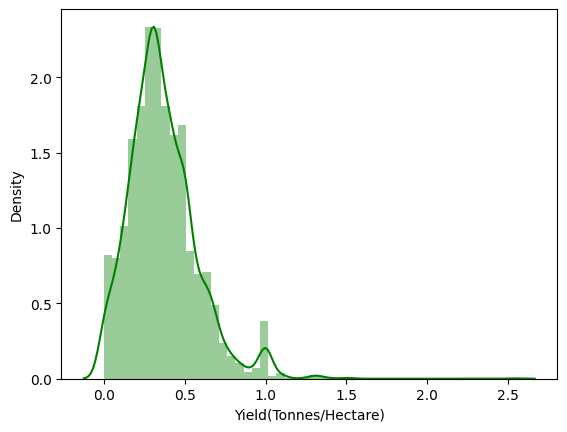

In [13]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [14]:
df['Yield(Tonnes/Hectare)']

0       0.00
1       0.12
3       0.33
4       0.11
7       0.24
        ... 
5819    0.19
5820    0.16
5821    0.37
5822    0.25
5823    0.17
Name: Yield(Tonnes/Hectare), Length: 3756, dtype: float64

In [15]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 3641


In [16]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [17]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [18]:
df['Yield(Tonnes/Hectare)'].skew()

0.3357496805824231

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_12256\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

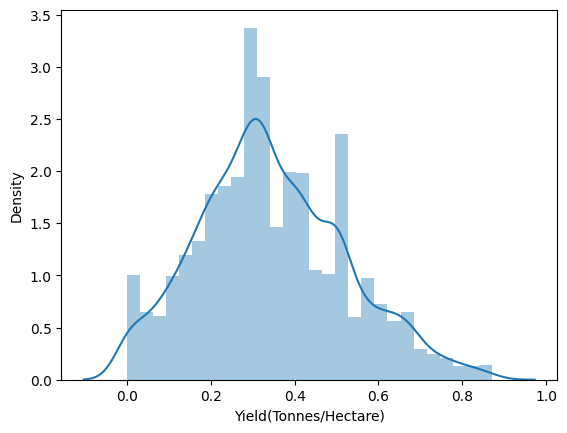

In [19]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [20]:
df.head(10)

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
0,25.307064,25.467482,26.090663,27.339234,28.485553,27.439704,26.799150,26.809056,0.456320,0.455932,...,7.678821,30,29,21,14,93.789346,92.211580,88.987134,81.987297,0.00
1,22.960316,23.970720,23.895035,23.528605,25.920954,25.178752,24.770886,24.462126,0.431257,0.394048,...,0.875974,4,10,19,4,80.801308,77.993752,82.697488,70.675712,0.12
3,29.003640,29.798366,29.104694,26.847424,29.718761,29.551720,29.406588,29.131937,0.411224,0.380983,...,4.790602,20,16,9,5,84.663312,82.174460,80.666003,74.171650,0.33
4,27.535183,25.643205,25.701279,25.625286,29.888207,29.022397,28.138907,27.466800,0.402249,0.450065,...,1.097120,13,11,17,2,69.881194,80.855041,82.059244,57.664025,0.11
7,26.457551,25.513435,25.725838,26.804432,29.898611,28.670863,27.646139,27.185659,0.413207,0.437991,...,0.000000,22,25,11,0,85.473606,89.565778,83.741973,48.831582,0.24
10,22.191769,22.496469,22.955941,22.982710,25.069128,24.227518,23.710603,23.539771,0.479733,0.468780,...,8.407460,13,14,9,10,90.086978,87.819147,84.993294,85.618384,0.28
11,28.356021,27.268741,28.224329,29.868667,31.089928,30.141899,29.427322,29.220672,0.389413,0.456131,...,0.024289,11,9,2,0,75.603396,81.660981,69.499016,42.581321,0.45
12,31.839741,29.086374,28.801057,26.882539,31.389609,31.072861,30.409463,29.722896,0.345033,0.413908,...,0.000000,13,9,10,0,72.866498,84.164029,77.917139,56.744040,0.39
13,26.611001,24.775974,26.530745,27.325712,30.026695,28.830965,27.777758,27.531524,0.462793,0.472777,...,0.215805,15,20,10,1,84.356545,88.022103,80.744198,49.125986,0.44
14,25.043927,24.106031,24.430757,25.630743,28.350951,27.155529,26.216517,25.730928,0.365029,0.385169,...,0.594924,4,8,8,2,83.707528,85.397722,83.311891,59.792026,0.55


In [21]:
df.shape

(3641, 57)

In [22]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [23]:
df.head()

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
0,25.307064,25.467482,26.090663,27.339234,28.485553,27.439704,26.799150,26.809056,0.456320,0.455932,...,7.678821,30,29,21,14,93.789346,92.211580,88.987134,81.987297,0.00
1,22.960316,23.970720,23.895035,23.528605,25.920954,25.178752,24.770886,24.462126,0.431257,0.394048,...,0.875974,4,10,19,4,80.801308,77.993752,82.697488,70.675712,0.12
3,29.003640,29.798366,29.104694,26.847424,29.718761,29.551720,29.406588,29.131937,0.411224,0.380983,...,4.790602,20,16,9,5,84.663312,82.174460,80.666003,74.171650,0.33
4,27.535183,25.643205,25.701279,25.625286,29.888207,29.022397,28.138907,27.466800,0.402249,0.450065,...,1.097120,13,11,17,2,69.881194,80.855041,82.059244,57.664025,0.11
7,26.457551,25.513435,25.725838,26.804432,29.898611,28.670863,27.646139,27.185659,0.413207,0.437991,...,0.000000,22,25,11,0,85.473606,89.565778,83.741973,48.831582,0.24


In [24]:
df.shape

(3641, 57)

In [25]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [26]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [27]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [28]:
df.shape

(3641, 57)

In [29]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.21, R^2 Score (Test): 0.18
[0.14062074410365832, 0.20411502947900462, 0.21219058047126027, 0.16835737878732748, 0.14639616542995315, 0.18272404704933132, 0.19411148774287612, 0.16471737983308476, 0.20746697455647423, 0.17807069317342017]
Ridge Regression - R^2 Score (Train) : 0.21, R^2 Score (Test): 0.18
[0.19211550016918322, 0.15192531603359405, 0.15660160981229865, 0.15218931112096945, 0.1609706651965691, 0.21342369017806828, 0.19824863343199528, 0.19109277679619485, 0.21769304684119317, 0.13934959497300436]


c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.55489e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.55484e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.56593e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.60857e-17): result may not be

XGB Regressor - R^2 Score (Train) : 0.99, R^2 Score (Test): 0.35
[0.3222816326628434, 0.35315582674755563, 0.3195480990408974, 0.3516641288936829, 0.345318964296912, 0.3421960071693032, 0.3051207795609612, 0.34761795453573463, 0.38992168885518963, 0.3974765982841518]
Lasso Regression - R^2 Score (Train) : 0.07, R^2 Score (Test): 0.07
[0.08621233792746208, 0.023039944653166722, 0.04829261829447229, 0.0703348096728802, 0.029634790589828652, 0.11833750757669814, 0.060760527020402244, 0.08911562390237593, 0.039437068889115356, 0.0999859664549907]
Decision Tree - R^2 Score (Train) : 1.00, R^2 Score (Test): -0.28
[-0.46593327191417444, -0.2752717102835138, -0.35942090921104497, -0.38658375607954887, -0.28025536974123755, -0.2916674955195948, -0.16086903467647962, -0.46510297628228936, -0.08589874085085691, -0.07898384549015458]
Gradient Boosting - R^2 Score (Train) : 0.49, R^2 Score (Test): 0.29
[0.3231492233878096, 0.30029878870502813, 0.30914570316178036, 0.26832197044480255, 0.26081847428

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [34]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [35]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

78


In [36]:
print(columns_to_drop)

['stl1_8', 'stl4_8', 'stl4_9', 'stl4_10', 'stl1_7', 'stl1_9', 'stl4_7', 'stl4_8', 'stl4_9', 'stl4_10', 'stl1_8', 'stl4_9', 'stl4_10', 'stl4_10', 'stl1_8', 'stl4_8', 'stl4_9', 'stl4_10', 'stl1_7', 'stl1_8', 'stl4_7', 'stl4_9', 'stl4_10', 'stl1_7', 'stl1_8', 'stl1_9', 'stl4_7', 'stl4_8', 'stl4_10', 'stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9', 'swvl2_7', 'swvl2_8', 'swvl2_9', 'swvl1_7', 'swvl3_7', 'swvl3_8', 'swvl1_8', 'swvl3_8', 'swvl3_9', 'swvl1_9', 'swvl3_9', 'swvl3_10', 'swvl2_7', 'swvl3_8', 'swvl2_7', 'swvl2_8', 'swvl3_7', 'swvl3_9', 'swvl2_8', 'swvl2_9', 'swvl3_8', 'swvl2_9', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'tmax_8', 'tmax_7', 'tmin_8', 'tmin_9', 'tmin_7', 'tmin_9', 'tmin_7', 'tmin_8']


In [37]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_7 : [('stl1_8', 0.918), ('stl4_8', 0.908), ('stl4_9', 0.9268), ('stl4_10', 0.9329)]
stl1_8 : [('stl1_7', 0.918), ('stl1_9', 0.9152), ('stl4_7', 0.9021), ('stl4_8', 0.9347), ('stl4_9', 0.9578), ('stl4_10', 0.9589)]
stl1_9 : [('stl1_8', 0.9152), ('stl4_9', 0.9057), ('stl4_10', 0.9377)]
stl1_10 : [('stl4_10', 0.9028)]
stl4_7 : [('stl1_8', 0.9021), ('stl4_8', 0.9934), ('stl4_9', 0.9817), ('stl4_10', 0.9688)]
stl4_8 : [('stl1_7', 0.908), ('stl1_8', 0.9347), ('stl4_7', 0.9934), ('stl4_9', 0.996), ('stl4_10', 0.9872)]
stl4_9 : [('stl1_7', 0.9268), ('stl1_8', 0.9578), ('stl1_9', 0.9057), ('stl4_7', 0.9817), ('stl4_8', 0.996), ('stl4_10', 0.9949)]
stl4_10 : [('stl1_7', 0.9329), ('stl1_8', 0.9589), ('stl1_9', 0.9377), ('stl1_10', 0.9028), ('stl4_7', 0.9688), ('stl4_8', 0.9872), ('stl4_9', 0.9949)]
swvl1_7 : [('swvl2_7', 0.9248)]
swvl1_8 : [('swvl2_8', 0.9362)]
swvl1_9 : [('swvl2_9', 0.9405)]
swvl2_7 : [('swvl1_7', 0.9248), ('swvl3_7', 0.9127), ('swvl3_8', 0.9317)

In [38]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")